In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn import metrics

In [2]:
#Obtain and save the data
data = pd.read_csv("C:/Users/ianic/Desktop/titanic.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
#Dropping the Ticket column
data = data.drop(data.columns[8], axis=1)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [4]:
#Find out how many missing values exist
data.apply(lambda d: sum(d.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Cabin will be sorted out later therefore, 
#Since only age has null values and more than 10% of the total records are null I choose to replace the null with mean/mode/median
#(NB: This is my own check i.e. records with null values are only removed if the count or null values doesn't exceed 10%)
data.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [6]:
data.Age.mode()

0    24.0
dtype: float64

In [7]:
#Impute age with median
data['Age'].fillna(data.Age.median(), inplace=True)

In [8]:
#Impute Embarked with S
data = data.fillna({"Embarked" : "S"})

In [9]:
#Ensure all null values for Age have been filled
data.apply(lambda d: sum(d.isnull()), axis = 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,NaN,C


In [11]:
#Impute null Cabin values with false
data['Cabin'].fillna('False', inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,False,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,False,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,False,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,False,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,False,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,False,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,False,C


In [12]:
#Replace all other Cabin values with true
data.loc[data['Cabin'] != 'False', 'Cabin'] = 'True'
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,False,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,False,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,True,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,False,S
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,8.4583,False,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,True,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,False,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,False,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,False,C


In [13]:
#Find out data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [14]:
#Use label encoding on sex and cabin and convert the male/female and true/false respectively to 1/0
le = LabelEncoder()
column_encode = ['Sex', 'Cabin']

for i in column_encode:
    data[i] = le.fit_transform(data[i])
    
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,S
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,8.4583,0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,1,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,0,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,0,C


In [15]:
#Change data type of Embarked to prepare for label encoding
data["Embarked"] = data["Embarked"].astype('category')
data.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Fare            float64
Cabin             int64
Embarked       category
dtype: object

In [16]:
#Perform Label Encoding on the Embarked column
data["Embarked"] = data["Embarked"].cat.codes
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,2
5,6,0,3,"Moran, Mr. James",1,28.0,0,0,8.4583,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,51.8625,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,21.0750,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,11.1333,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,30.0708,0,0


In [17]:
#Find out arrangement of the age values so as to create categories
data.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
#Categorize Age
data.Age = pd.cut(data['Age'], bins=[0, 18, 34, 50, 81], include_lowest=True, labels=['iGeneration', 'Millenial', 'Generation X', 'Baby Boomers'])
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,Millenial,1,0,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,Generation X,1,0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,Millenial,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,Generation X,1,0,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,Generation X,0,0,8.0500,0,2
5,6,0,3,"Moran, Mr. James",1,Millenial,0,0,8.4583,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,Baby Boomers,0,0,51.8625,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,iGeneration,3,1,21.0750,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,Millenial,0,2,11.1333,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,iGeneration,1,0,30.0708,0,0


In [19]:
#Label Encode the Age
data["Age"] = data["Age"].astype('category')
data["Age"] = data["Age"].cat.codes
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,7.2500,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,71.2833,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,7.9250,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,53.1000,1,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,8.0500,0,2
5,6,0,3,"Moran, Mr. James",1,1,0,0,8.4583,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,51.8625,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,21.0750,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,11.1333,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,30.0708,0,0


In [20]:
#Find out arrangement of the fare values so as to create categories
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [21]:
#Categorize Fare
data.Fare = pd.cut(data['Fare'], bins=[0, 128, 257, 394, 513], include_lowest=True, labels=['Low', 'Fair', 'Medium', 'High'])
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,Low,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,Low,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,Low,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,Low,1,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,Low,0,2
5,6,0,3,"Moran, Mr. James",1,1,0,0,Low,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,Low,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,Low,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,Low,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,Low,0,0


In [22]:
#Label Encode the Fare
data["Fare"] = data["Fare"].astype('category')
data["Fare"] = data["Fare"].cat.codes
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,0,0,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,0,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,0,1,2
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,0,0,2
5,6,0,3,"Moran, Mr. James",1,1,0,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,0,0,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,3,1,0,0,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,2,0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,1,0,0,0,0


In [23]:
#Combine SibSp and Parch into Family and drop them
data["Family"] = data["SibSp"].astype(int) + data["Parch"].astype(int)

#This drops SibSp as Parch becomes the new data.columns[6]
data = data.drop(data.columns[6], axis=1)

#We now drop Parch which is index 6 after dropping SibSp
data = data.drop(data.columns[6], axis=1)
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,0,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,2,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,0,1,2,1
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,2,0
5,6,0,3,"Moran, Mr. James",1,1,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,3,0,1,2,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,0,0,0,2,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,1,0,0,2,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,0,0,0,0,1


In [24]:
#Splitting Name column

#In the name column, the title is in between a comma and fullstop i.e. Firstname, Title. LastNames
#I will use the comma and fullstop as delimiters to obtain the title alone

#Split the Name column first based on the comma
first_split = data["Name"].str.split(",", n = 1, expand = True)

#Obtain the second part of what was split as it has the Title + LastNames and since its stored as an array the second is index 1
second_part = first_split[1]

#Print its contents
second_part.head(10)

0                                Mr. Owen Harris
1     Mrs. John Bradley (Florence Briggs Thayer)
2                                    Miss. Laina
3             Mrs. Jacques Heath (Lily May Peel)
4                              Mr. William Henry
5                                      Mr. James
6                                  Mr. Timothy J
7                          Master. Gosta Leonard
8       Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Mrs. Nicholas (Adele Achem)
Name: 1, dtype: object

In [25]:
#Split the variable holding the data above i.e. second_part

#Split using the fullstop as the delimiter
last = second_part.str.split(".", n = 1, expand = True)

#Obtain the first part of the split which now contains the titles alone and since its stored as an array the first is index 0
titles = last[0]

#Print its contents
titles.head(10)

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
5         Mr
6         Mr
7     Master
8        Mrs
9        Mrs
Name: 0, dtype: object

In [26]:
#Assign the titles as the new Name column values and rename it
data.Name = titles
data.rename(columns={'Name':'Title'}, inplace=True)
data.head(10)

,PassengerId,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,Mr,1,1,0,0,2,1
1,2,1,1,Mrs,0,2,0,1,0,1
2,3,1,3,Miss,0,1,0,0,2,0
3,4,1,1,Mrs,0,2,0,1,2,1
4,5,0,3,Mr,1,2,0,0,2,0
5,6,0,3,Mr,1,1,0,0,1,0
6,7,0,1,Mr,1,3,0,1,2,0
7,8,0,3,Master,1,0,0,0,2,4
8,9,1,3,Mrs,0,1,0,0,2,2
9,10,1,2,Mrs,0,0,0,0,0,1


In [27]:
#Label Encode the Title
data["Title"] = data["Title"].astype('category')
data["Title"] = data["Title"].cat.codes
data.head(10)

,PassengerId,Survived,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,11,1,1,0,0,2,1
1,2,1,1,12,0,2,0,1,0,1
2,3,1,3,8,0,1,0,0,2,0
3,4,1,1,12,0,2,0,1,2,1
4,5,0,3,11,1,2,0,0,2,0
5,6,0,3,11,1,1,0,0,1,0
6,7,0,1,11,1,3,0,1,2,0
7,8,0,3,7,1,0,0,0,2,4
8,9,1,3,12,0,1,0,0,2,2
9,10,1,2,12,0,0,0,0,0,1


In [28]:
#Reorder columns
data = data[['PassengerId', 'Pclass', 'Title', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked', 'Family', 'Survived']]
data.head(10)

,PassengerId,Pclass,Title,Sex,Age,Fare,Cabin,Embarked,Family,Survived
0,1,3,11,1,1,0,0,2,1,0
1,2,1,12,0,2,0,1,0,1,1
2,3,3,8,0,1,0,0,2,0,1
3,4,1,12,0,2,0,1,2,1,1
4,5,3,11,1,2,0,0,2,0,0
5,6,3,11,1,1,0,0,1,0,0
6,7,1,11,1,3,0,1,2,0,0
7,8,3,7,1,0,0,0,2,4,0
8,9,3,12,0,1,0,0,2,2,1
9,10,2,12,0,0,0,0,0,1,1


In [29]:
#Split data and classes
X = data.iloc[:, :-1].values 
Y = data.iloc[:, 9].values 

In [30]:
#Split testing and training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 

In [31]:
#Initialize Gaussian algorithm and train it
gnb = GaussianNB()
gnb.fit(X_train, Y_train)

GaussianNB(priors=None)

In [32]:
#Calculate accuracy
gnb.score(X_test, Y_test)

0.7723880597014925

In [33]:
Y_pred = gnb.predict(X_train)

In [34]:
print(metrics.classification_report(Y_train, Y_pred))

             precision    recall  f1-score   support

          0       0.79      0.80      0.80       379
          1       0.69      0.68      0.68       244

avg / total       0.75      0.75      0.75       623



In [35]:
#Produce a Confusion matrix
print(metrics.confusion_matrix(Y_train, Y_pred))

[[304  75]
 [ 79 165]]


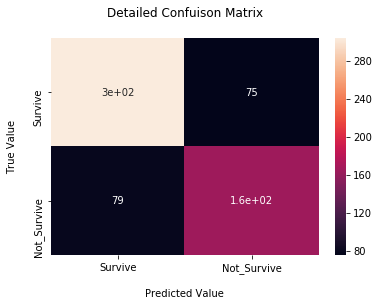

In [36]:
#Produce a more detailed confusion matrix
cm_data = pd.DataFrame(metrics.confusion_matrix(Y_train, Y_pred), index = ['Survive', 'Not_Survive'], columns = ['Survive', 'Not_Survive'])

plt.figure(figsize = (6,4))
sb.heatmap(cm_data, annot = True)
plt.title("Detailed Confuison Matrix\n")
plt.xlabel("\nPredicted Value")
plt.ylabel("True Value\n")
plt.show()